# Clean and EDA on Diamonds data

My dataset is about 54000 diamonds,(https://www.kaggle.com/shivam2503/diamonds) This is the specification by shivamagrawal: 

"A data frame with 53940 rows and 10 variables:

 price: price in US dollars (\$326--\$18,823)

 carat: weight of the diamond (0.2--5.01)

 cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

 color: diamond colour, from J (worst) to D (best)

 clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
 
 depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

 table: width of top of diamond relative to widest point (43--95)

 x: length in mm (0--10.74)

 y: width in mm (0--58.9)

 z: depth in mm (0--31.8)"

## Data clean

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)

In [ ]:
dia = pd.read_csv('diamonds.csv')
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There is no missing value.

In [ ]:
dia.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The unnamed columns should be the ID of diamonds. SO I will change that to ID to make more sense.

In [ ]:
dia.rename(columns={'Unnamed: 0': 'ID'}, inplace=True) ##rename the first column

The min for x ,y, z, are 0. That does't look good.

In [ ]:
dia.loc[dia['x'] == 0] ## find all rows value in x column is 0
dia.loc[dia['y'] == 0] ## find all rows value in y column is 0
dia.loc[dia['z'] == 0] ## find all rows value in z column is 0

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


They are the wrong data that we need to delete.

In [ ]:
dia = dia[dia.x != 0] ##delete the row that x = 0
dia = dia[dia.y != 0] ##delete the row that y = 0
dia = dia[dia.z != 0] ##delete the row that z = 0
dia.describe()

,ID,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


This looks healthy enough now.

## Distribute

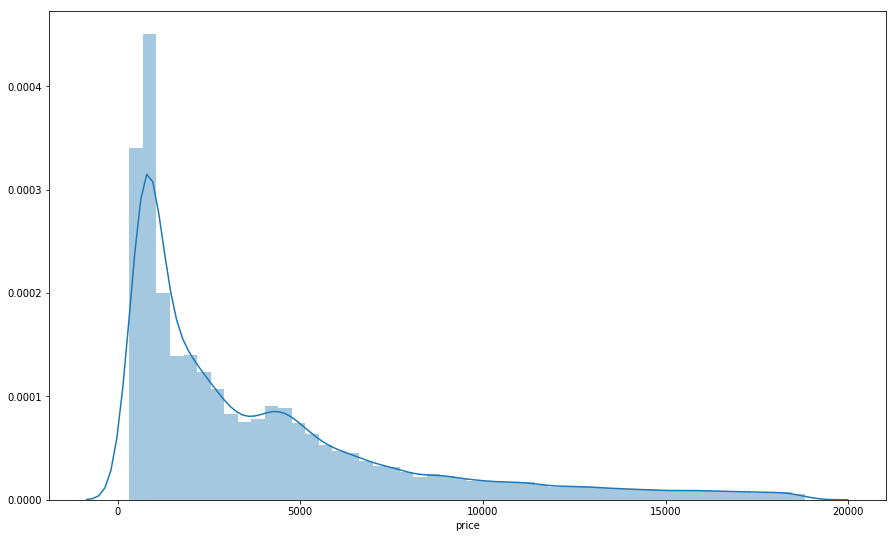

In [ ]:
sns.distplot(dia['price']) ## show the distribute of price
plt.show()

When we talk about diamonds, the thing we care about mostly is price. So the distribute of price should be able to represent the overall data.
Most of diamonds worth less than 1000. The most expensive one is about 180000. 

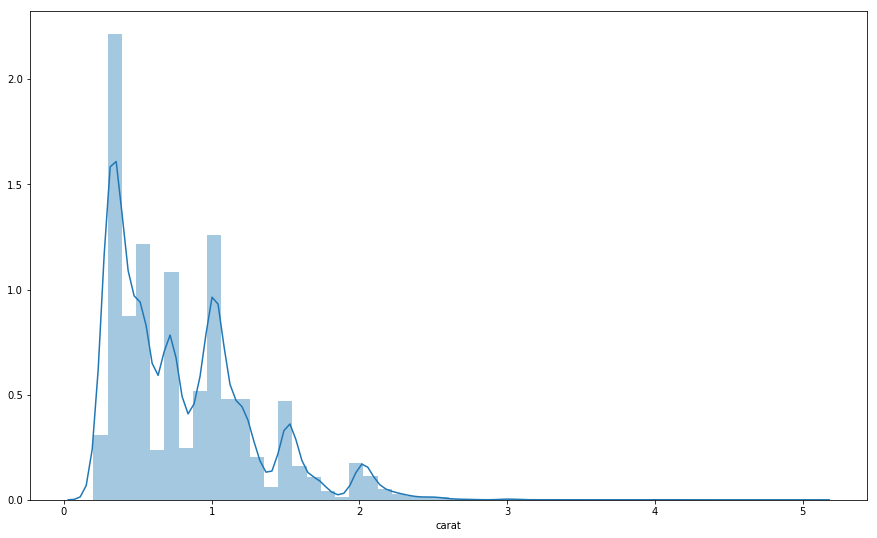

In [ ]:
sns.distplot(dia['carat'])
plt.show()

Many factors could influence price. Carat should be one of the most important. The distribute of carat looks similar to price.

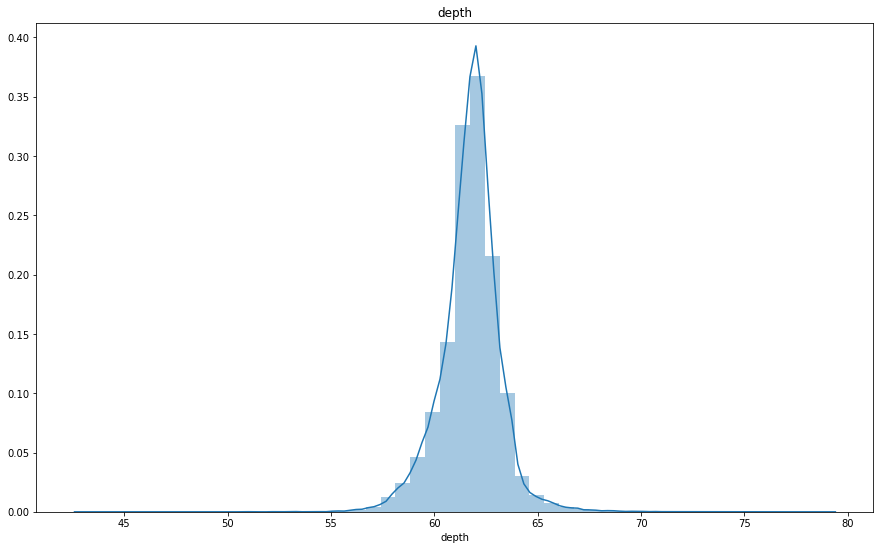

In [ ]:
sns.distplot(dia['depth'])
plt.title('depth')
plt.show()

Distribute for depth.

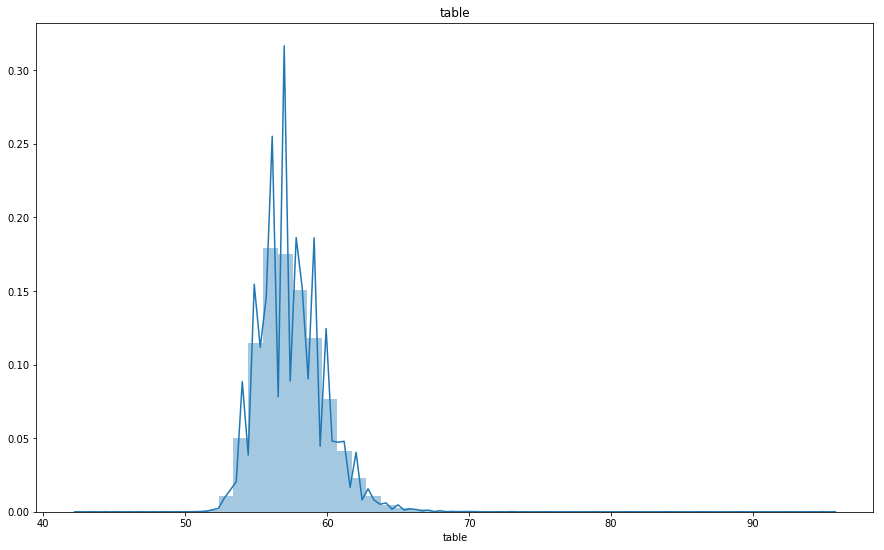

In [ ]:
sns.distplot(dia['table'])
plt.title('table')
plt.show()

Distribute for table.

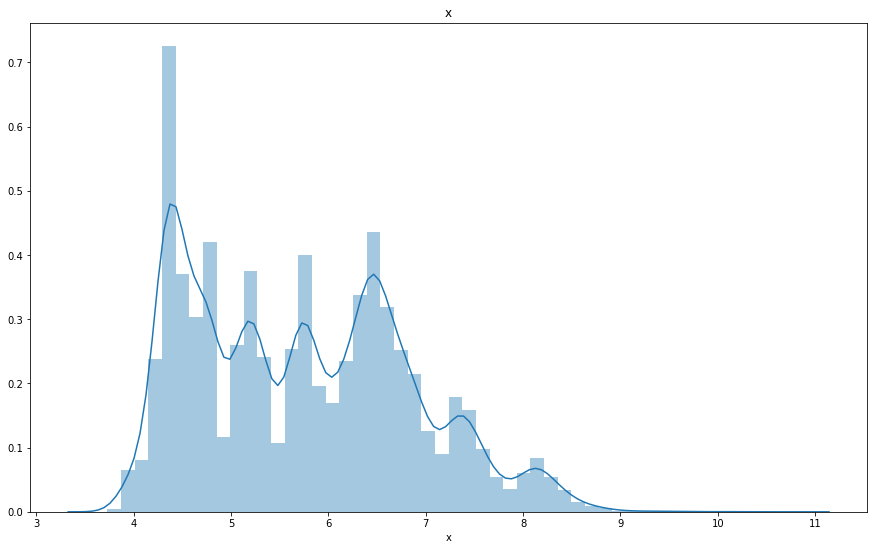

In [ ]:
sns.distplot(dia['x'])
plt.title('x')
plt.show()

Distribute for x.

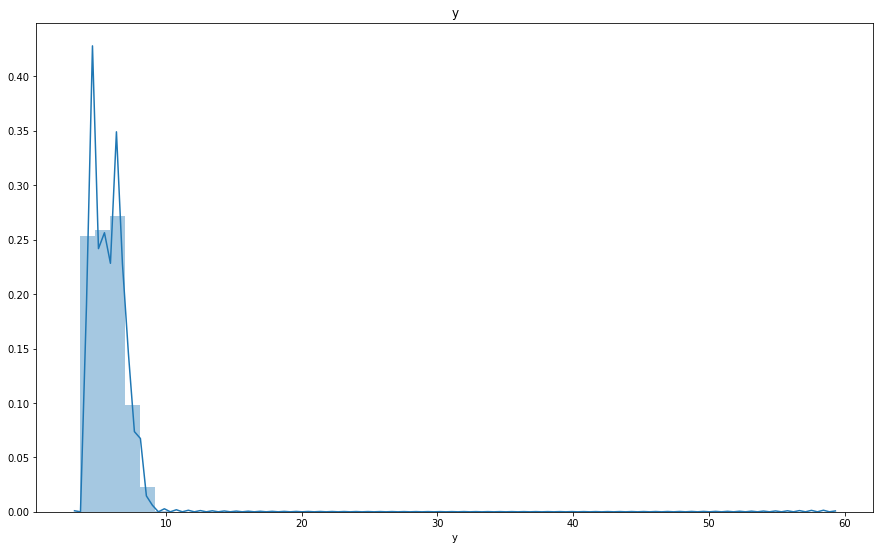

In [ ]:
sns.distplot(dia['y'])
plt.title('y')
plt.show()

Distribute for y.

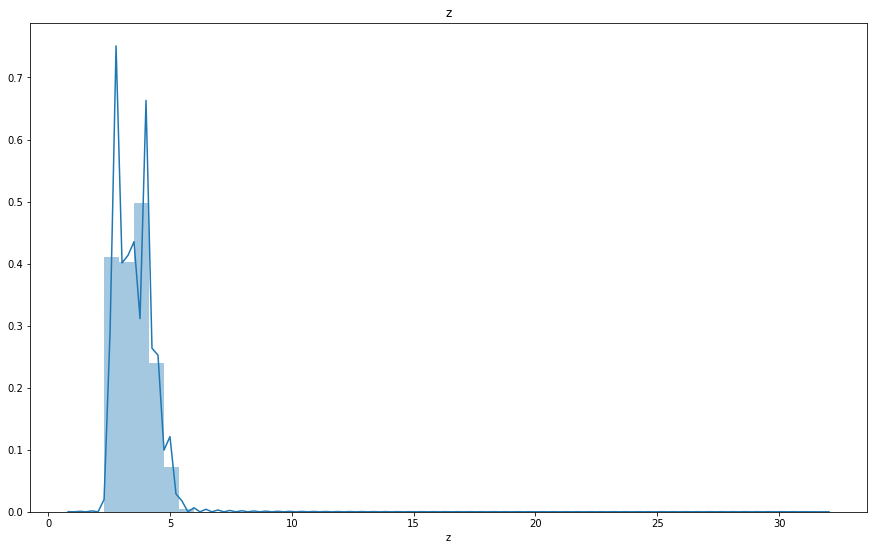

In [ ]:
sns.distplot(dia['z'])
plt.title('z')
plt.show()

Distribute for depth.

### Box Plot

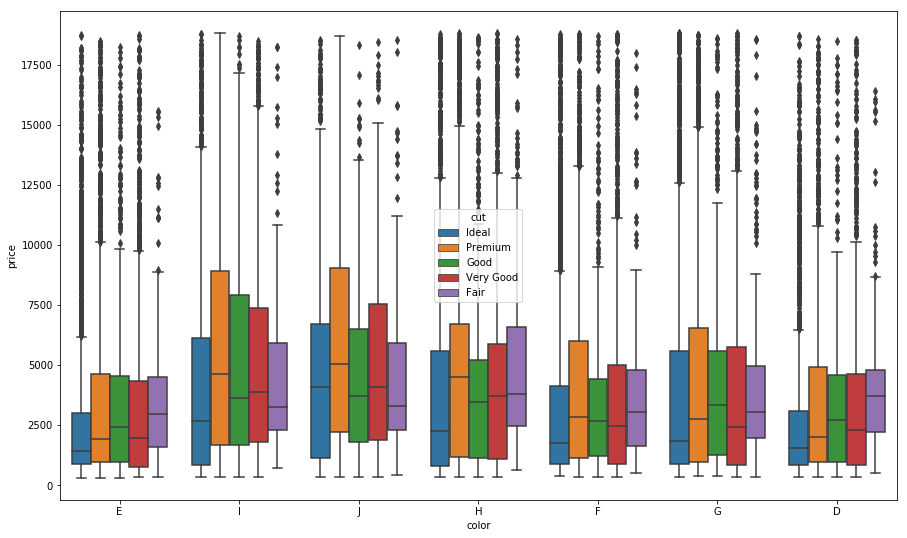

In [ ]:
sns.boxplot(x="color", y="price", hue="cut", data=dia)
plt.show()

This is the Box-Plot(X-axes: color, Y-axes: price). The ideal have most outliers. It is weried ideal worth less than premium. But from the previous analyses we know that the carat highly influence price. That give us a hypothesis to explaine why premium worth most: maybe premiums are bigger than ideal.

Let's test it.

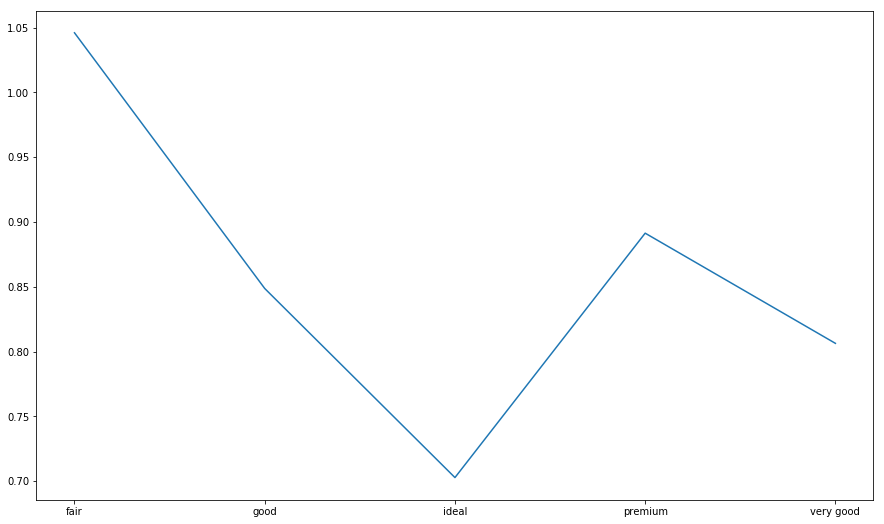

In [ ]:
ideal = dia[dia.cut == "Ideal"]
premium = dia[dia.cut == "Premium"]
good = dia[dia.cut == "Good"]
Very = dia[dia.cut == "Very Good"]
Fair = dia[dia.cut == "Fair"]
## the average carat of each cut
i = ideal["carat"].mean()
p = premium["carat"].mean()
g = good["carat"].mean()
v = Very["carat"].mean()
f = Fair["carat"].mean()
## set x-axes and y-axes
x=["fair","good","ideal","premium","very good"]
y=[f,g,i,p,v]
plt.plot(x,y)
plt.show()

You can see that the average carat of premium is bigger than ideal. 
Fair cut diamonds have the biggest average carat but the cut reduce price.

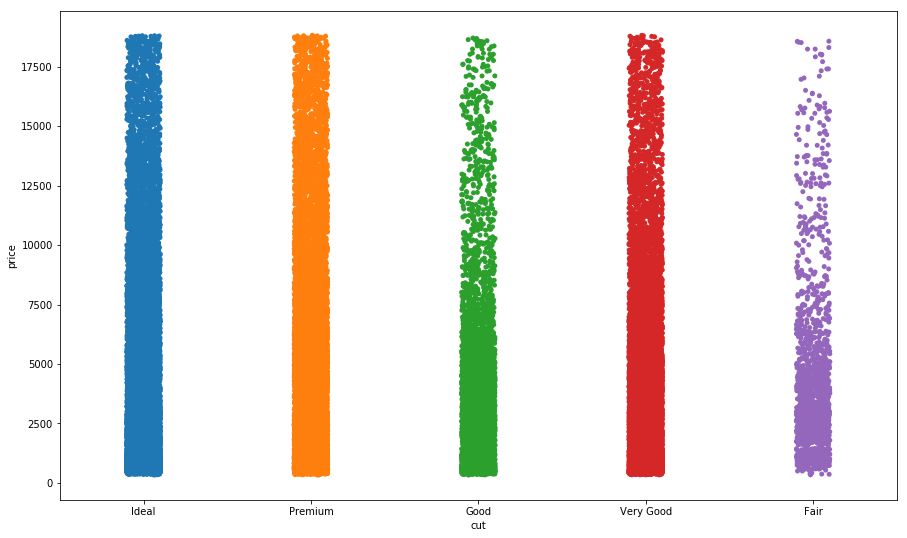

In [ ]:
sns.stripplot(x="cut", y="price", data=dia, jitter=True)
plt.show()

This picture shows the price distribute for different cut.

### Violin plots

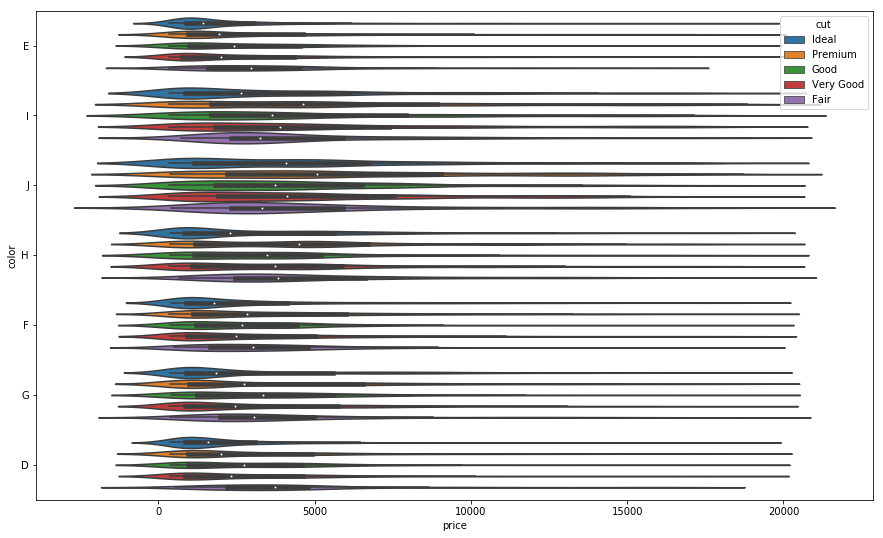

In [ ]:
sns.violinplot(x="price", y="color", hue="cut", data=dia)
plt.show()

This is the Violin plots of data, show the probability density of the price at different cut and color.

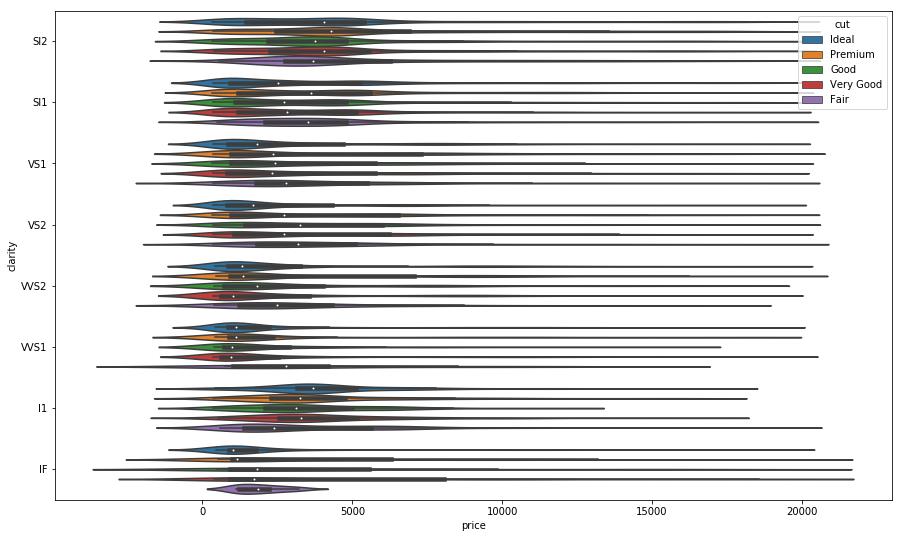

In [ ]:
sns.violinplot(x="price", y="clarity", hue="cut", data=dia)
plt.show()

The same analises on clarity and cut.

### Bar charts 

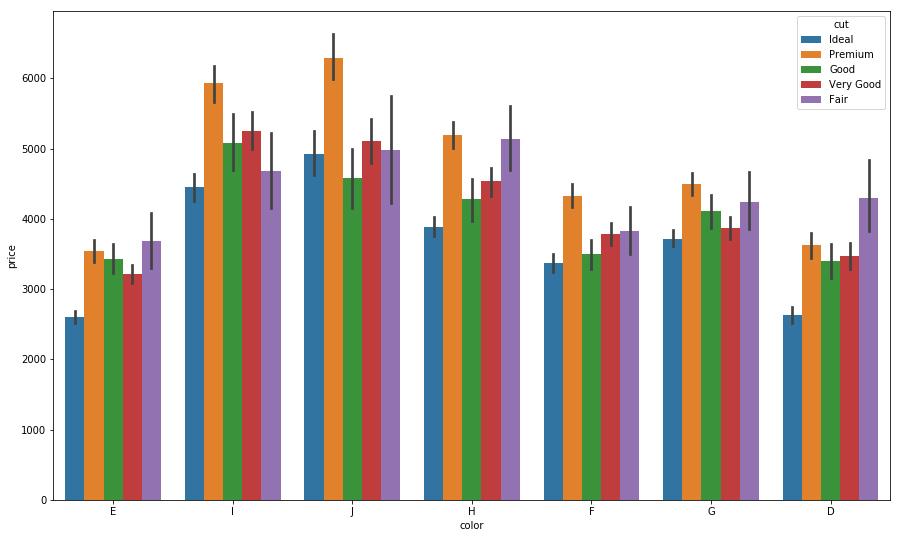

In [ ]:
sns.barplot(x="color", y="price", hue="cut", data=dia)
plt.show()

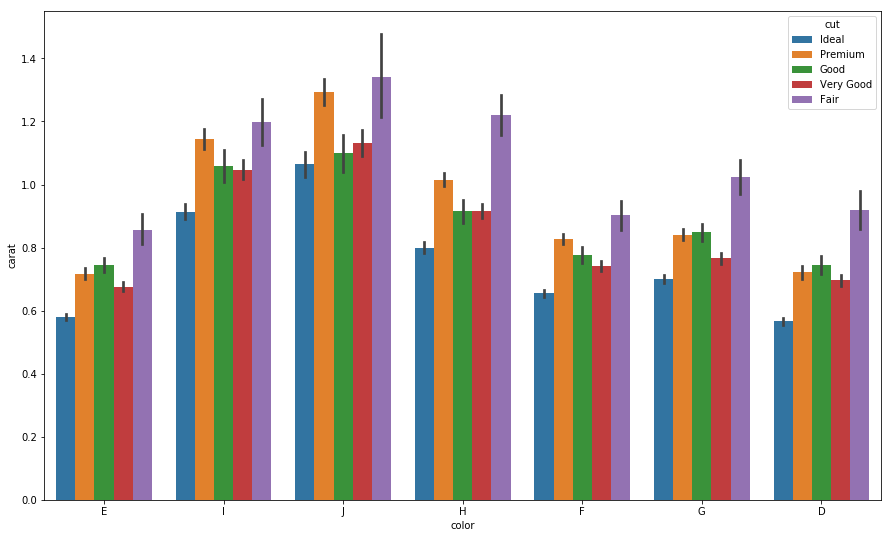

In [ ]:
sns.barplot(x="color", y="carat", hue="cut", data=dia)
plt.show()

This is the Bar charts on Price and Carat. Once again, the data shows that carat highly influence price.

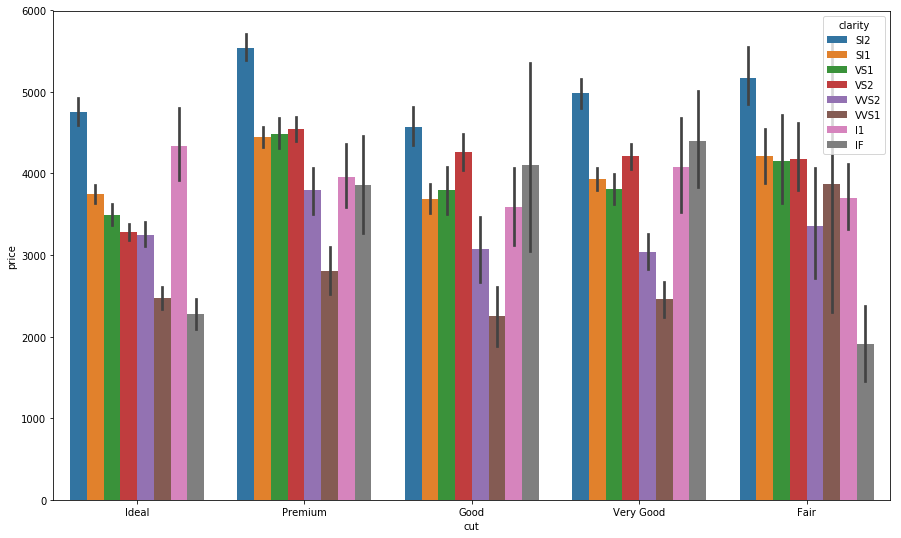

In [ ]:
sns.barplot(x="cut", y="price", hue="clarity", data=dia)
plt.show()

The best clarity: IF doesn't worth the most. So clarity is not a strong factor.

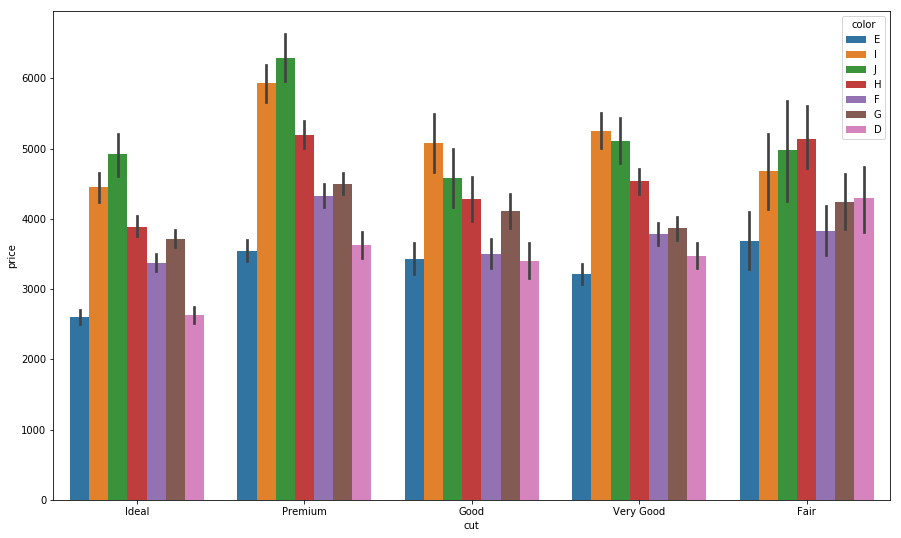

In [ ]:
sns.barplot(x="cut", y="price", hue="color", data=dia)
plt.show()

The worst color(J) worth more than the best color(D). Color is not a strong factor, either.

### Point plots

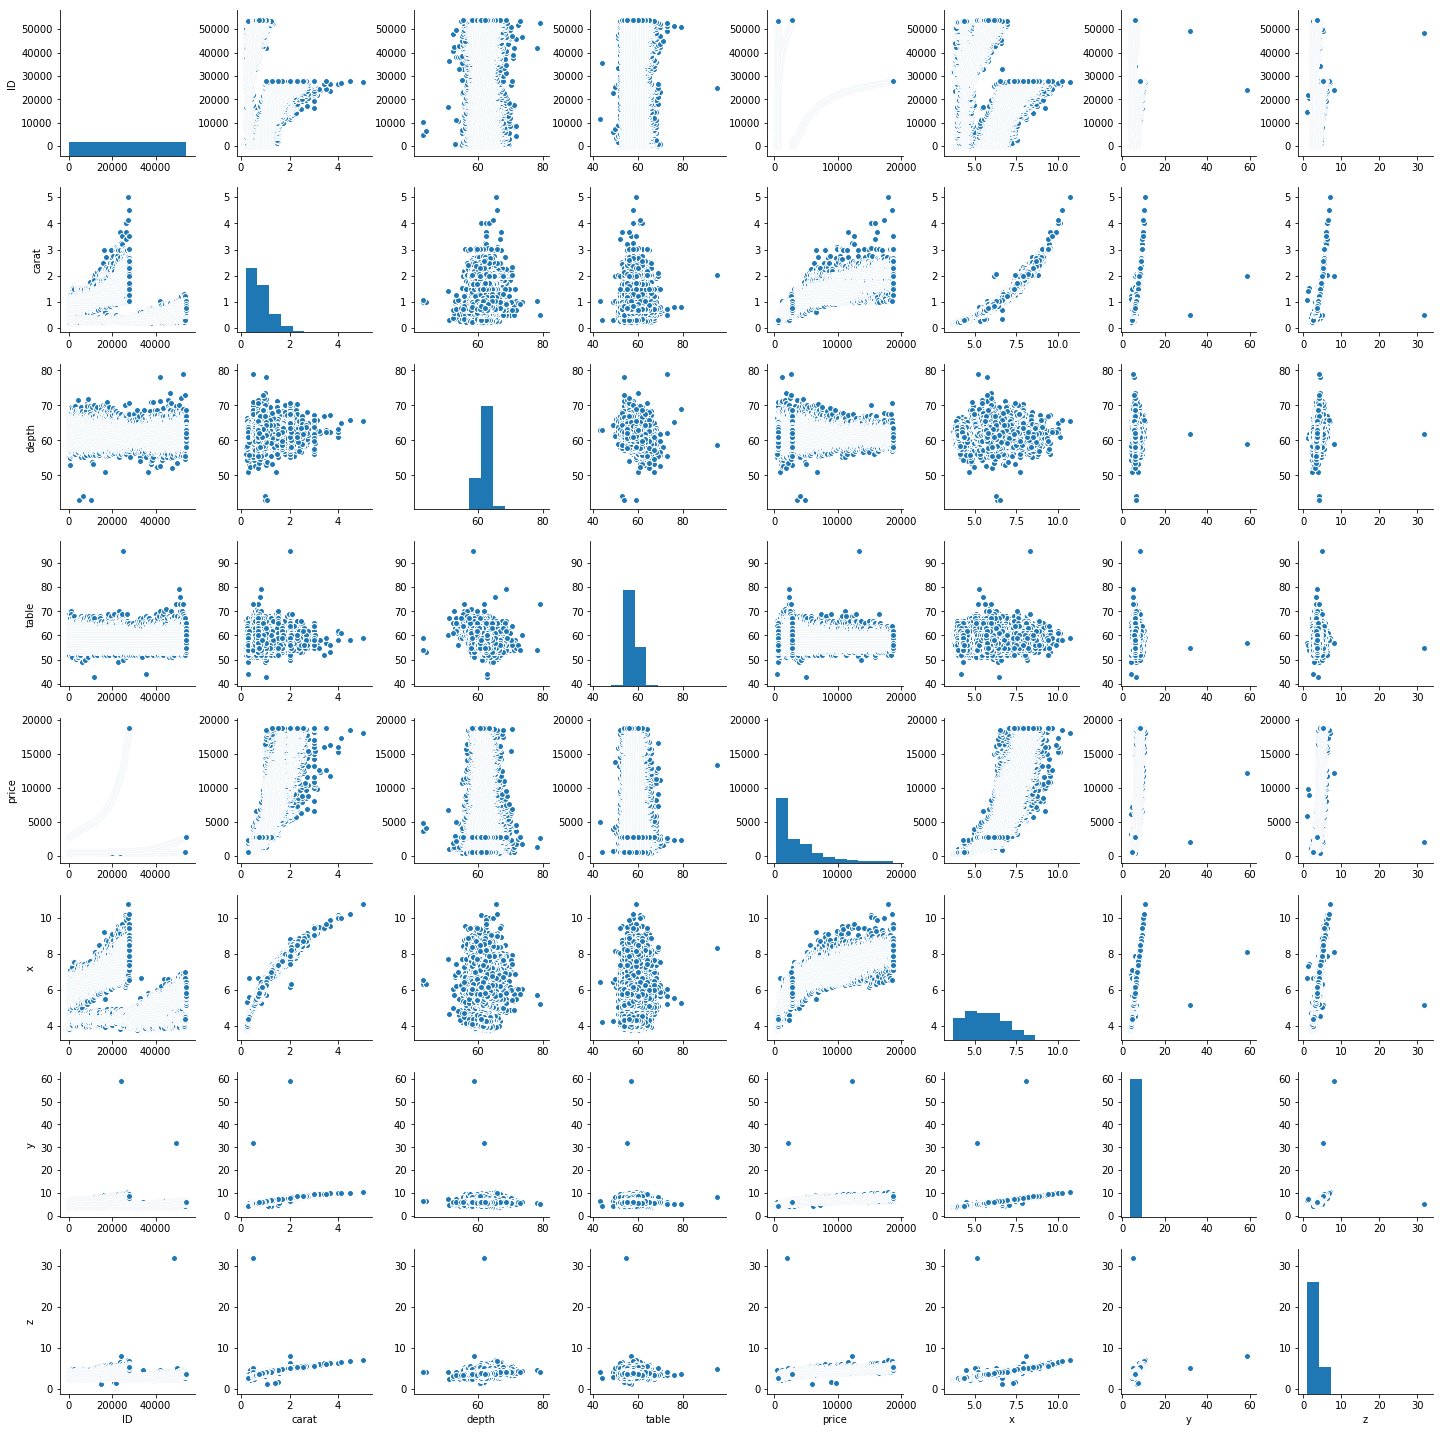

In [ ]:
sns.pairplot(dia)
plt.show()

## Correlation

          price     carat     depth     table
price  1.000000  0.921592 -0.010729  0.127245
carat  0.921592  1.000000  0.028259  0.181646
depth -0.010729  0.028259  1.000000 -0.295733
table  0.127245  0.181646 -0.295733  1.000000


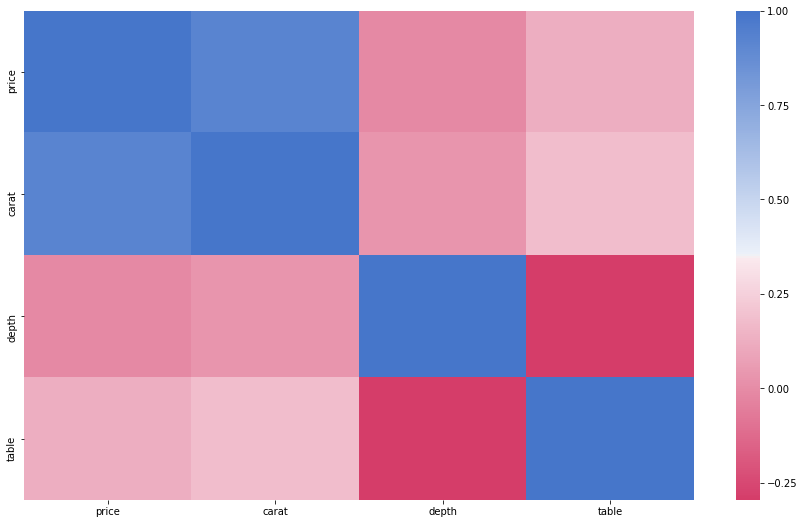

In [ ]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = dia[['price', 'carat', 'depth', 'table']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

This show us carat is highly related to price.

          depth     table         x         y         z
depth  1.000000 -0.295733 -0.025017 -0.029069  0.095023
table -0.295733  1.000000  0.196097  0.184493  0.152483
x     -0.025017  0.196097  1.000000  0.974918  0.975435
y     -0.029069  0.184493  0.974918  1.000000  0.956744
z      0.095023  0.152483  0.975435  0.956744  1.000000


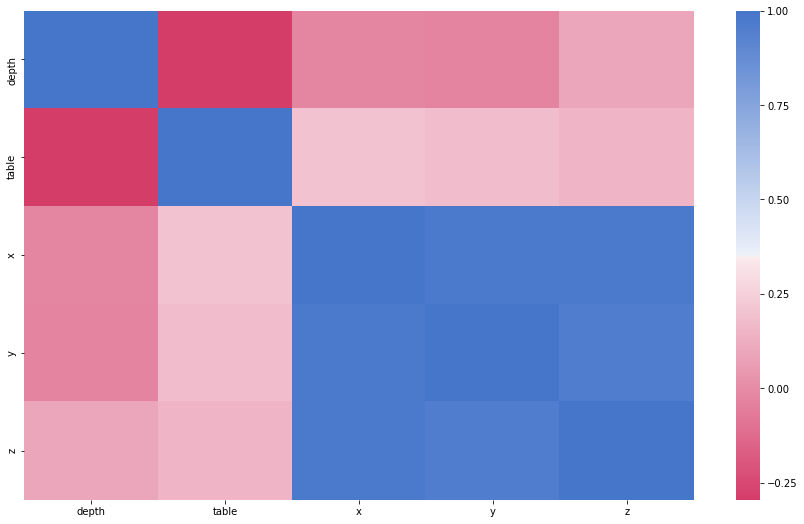

In [ ]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = dia[['depth', 'table', 'x', 'y', 'z']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

x, y, z highly related to each other, but has nothing to do with depth and table.

## Visualizing linear relationships

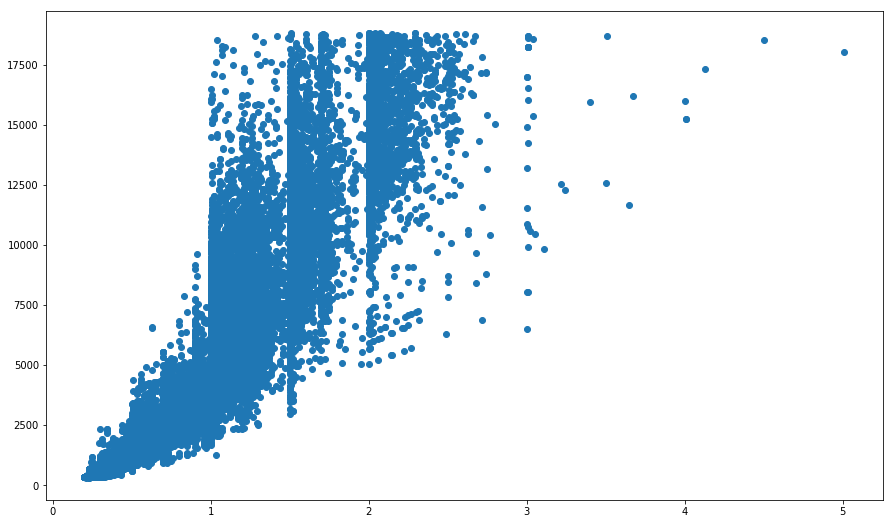

In [ ]:
plt.scatter(dia["carat"], dia["price"])
plt.show()

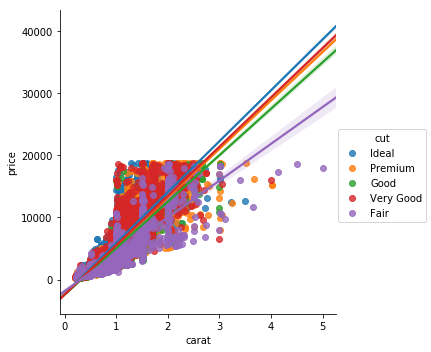

In [ ]:
sns.lmplot(x="carat", y="price", hue="cut", data=dia)
plt.show()

liner regression between carat and price for different cut. Better cut worth more in the same carat.

## Summary

1. Factors that influence price: Carat > Cut > Color = Clarity.
2. Factors that have not straight correlation to price: depth, table, x, y, z.
3. For ideal cut diamonds, there are more outliers. They worth a lot more.
4. Average carat for each cut: Fair > Premium > good > very good > ideal
5. Better cut diamond worth more in the same carat.
6. x, y, z highly related to each other, but has nothing to do with depth and table.
7. Column in Normal distribution: depth, table.
8. Column in Skewed distribution: carat, price, x, y, z. (they have high correlation)